### Data Overview

In [56]:
import pandas as pd

df = pd.read_csv("app/bank-full.csv",delimiter=';')
print(df.shape)

(45211, 17)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [45]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

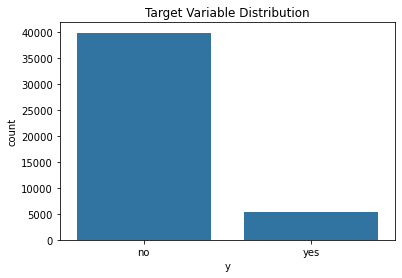

no     0.883015
yes    0.116985
Name: y, dtype: float64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='y')
plt.title("Target Variable Distribution")
plt.show()

print(df['y'].value_counts(normalize=True))

# Data Cleaning

### Data Observation
| Column    | Type        | Observation                                     | Cleaning Action                                                   |
| --------- | ----------- | ----------------------------------------------- | ----------------------------------------------------------------- |
| age       | Numerical   | 45,211 values — all present                     | Check for outliers (e.g., age > 90)                               |
| job       | Categorical | 12 unique values                                | Look for 'unknown' values; standardize categories                 |
| marital   | Categorical | 3 values (e.g., married/single/divorced)        | No cleaning unless 'unknown' exists                               |
| education | Categorical | 4 values                                        | Often contains 'unknown'; clean or encode accordingly             |
| default   | Categorical | 2 values                                        | Often includes 'unknown'; evaluate meaning and recode             |
| balance   | Numerical   | Continuous values                               | Consider outlier treatment (e.g., very high or negative balances) |
| housing   | Categorical | 2 values (yes/no)                               | Check for 'unknown'                                               |
| loan      | Categorical | 2 values (yes/no)                               | Same as above                                                     |
| contact   | Categorical | 3 values (cellular, telephone, unknown)         | unknown' should be treated or excluded                            |
| day       | Numerical   | Day of the month (1–31)                         | No cleaning needed unless used in feature engineering             |
| month     | Categorical | 12 values                                       | Map month names to ordinal (e.g., Jan=1) if needed                |
| duration  | Numerical   | Call duration                                   | Must be dropped during training (leakage)                         |
| campaign  | Numerical   | Number of contacts during this campaign         | Consider for outlier check                                        |
| pdays     | Numerical   | 999 = not contacted in previous campaign        | Use with care; 999 is not "missing" but needs semantic handling   |
| previous  | Numerical   | Past campaign contacts                          | Keep as is; useful for modeling                                   |
| poutcome  | Categorical | 4 values (success, failure, other, nonexistent) | nonexistent is not missing — treat as a valid category            |
| y         | Target      | 2 values (yes, no)                              | Convert to binary (1 = yes, 0 = no)                               |

## Column - age

In [27]:
# Summary Statistics
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

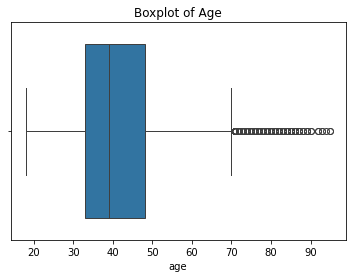

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['age'])
plt.title("Boxplot of Age")
plt.show()

In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: age < {lower_bound:.1f} or age > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print(f"\nNumber of outliers in age: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['age'].value_counts().sort_index())

Outlier threshold: age < 10.5 or age > 70.5

Number of outliers in age: 487

Outlier values:
71    54
72    52
73    44
74    37
75    39
76    32
77    44
78    30
79    25
80    31
81    17
82    19
83    22
84     9
85     5
86     9
87     4
88     2
89     3
90     2
92     2
93     2
94     1
95     2
Name: age, dtype: int64


### Action on Outliers
- Option A - Cap or Clip Outliers (This retains all records but limits extreme values.)
- Option B - Remove Outliers (This removes a small number of extreme rows, assuming they add noise.)
- Option C - Keep As-is


In [34]:
# Option C
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]
# Option A
#df['age'] = df['age'].clip(lower=lower_bound, upper=upper_bound)

## Column - Job

In [ ]:
# Check for typos, formatting issues, and 'unknown' entries.
#df['job'].value_counts()
df['job'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [18]:
# Standardize 'job' column
df['job'] = df['job'].str.lower().str.strip()
df['job'] = df['job'].replace('admin.', 'admin')

Handle 'unknown' Values
- Option A: Replace 'unknown' with the most frequent job (mode)
- Option B: Keep 'unknown' as a separate category
- Option C: Drop rows with 'unknown'

In [20]:
# Option A
most_common_job = df['job'].mode()[0]
print(f" Most common job {most_common_job}")
df['job'] = df['job'].replace('unknown', most_common_job)

# Option C
# df = df[df['job'] != 'unknown']

 Most common job blue-collar


## Column - education

In [26]:
#df['education'].value_counts()
df['education'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

secondary    55.43%
tertiary     29.42%
primary      15.15%
Name: education, dtype: object

In [23]:
# Option A
most_common_edu = df['education'].mode()[0]
print(f" Most common education {most_common_edu}")
df['education'] = df['education'].replace('unknown', most_common_edu)

# Option C
# df = df[df['education'] != 'unknown']

 Most common education secondary


## Column - contact

In [39]:
df['contact'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

cellular     64.89%
unknown      29.11%
telephone      6.0%
Name: contact, dtype: object

In [40]:
# Option A
most_common_contact = df['contact'].mode()[0]
print(f" Most common education {most_common_contact}")
df['contact'] = df['contact'].replace('unknown', most_common_contact)

# Option C - Not recommended , we may lose lot of valuable data here
# df = df[df['education'] != 'unknown']

 Most common education cellular


## Column - balance

In [41]:
df['balance'].describe()

count     44724.000000
mean       1345.344491
std        2983.219087
min       -8019.000000
25%          71.000000
50%         442.000000
75%        1408.000000
max      102127.000000
Name: balance, dtype: float64

In [42]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: balance < {lower_bound:.1f} or balance > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['balance'] < lower_bound) | (df['balance'] > upper_bound)]
print(f"\nNumber of outliers in balance: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['balance'].value_counts().sort_index())

Outlier threshold: balance < -1934.5 or balance > 3413.5

Number of outliers in balance: 4696

Outlier values:
-8019      1
-6847      1
-4057      1
-3372      1
-3313      1
          ..
 66653     1
 66721     1
 71188     1
 98417     1
 102127    1
Name: balance, Length: 3002, dtype: int64


### Action on Outliers
- Option A - Cap or Clip Outliers (This retains all records but limits extreme values.)
- Option B - Remove Outliers (This removes a small number of extreme rows, assuming they add noise.)
- Option C - Keep As-is
- Option D - Any values below zero (i.e., negative balances) should be converted to 0. This is a practical cleaning step, especially if negative balances don't have business relevance or could bias the model.


In [43]:
import numpy as np
df['balance'] = np.where(df['balance'] < 0, 0, df['balance'])

In [44]:
df['balance'].describe()

count     44724.000000
mean       1372.094647
std        2967.649251
min           0.000000
25%          71.000000
50%         442.000000
75%        1408.000000
max      102127.000000
Name: balance, dtype: float64

## Column - month

In [61]:
month_mapping = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
invalid_months = df[~df['month'].isin(month_mapping)]
print(f"Invalid months found: {len(invalid_months)}")

Invalid months found: 0


In [62]:
#df['month'].value_counts()
df['month'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

may    30.45%
jul    15.25%
aug    13.82%
jun    11.81%
nov     8.78%
apr     6.49%
feb     5.86%
jan      3.1%
oct     1.63%
sep     1.28%
mar     1.06%
dec     0.47%
Name: month, dtype: object

In [63]:
# Create a copy of the Original month Column
df['month_text'] = df['month']
# map months to ordinal values
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].map(month_mapping)
df['month']


0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64

## Column - campaign

In [67]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

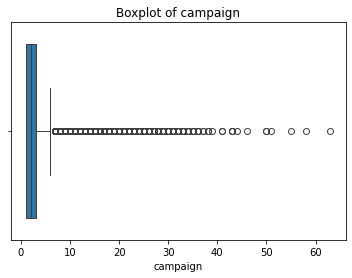

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['campaign'])
plt.title("Boxplot of campaign")
plt.show()

In [69]:
Q1 = df['campaign'].quantile(0.25)
Q3 = df['campaign'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: campaign < {lower_bound:.1f} or campaign > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['campaign'] < lower_bound) | (df['campaign'] > upper_bound)]
print(f"\nNumber of outliers in campaign: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['campaign'].value_counts().sort_index())

Outlier threshold: campaign < -2.0 or campaign > 6.0

Number of outliers in campaign: 3064

Outlier values:
7     735
8     540
9     327
10    266
11    201
12    155
13    133
14     93
15     84
16     79
17     69
18     51
19     44
20     43
21     35
22     23
23     22
24     20
25     22
26     13
27     10
28     16
29     16
30      8
31     12
32      9
33      6
34      5
35      4
36      4
37      2
38      3
39      1
41      2
43      3
44      1
46      1
50      2
51      1
55      1
58      1
63      1
Name: campaign, dtype: int64


In [70]:
print("Values below 0:", (df['campaign'] < 0).sum())
print("Values above 6:", (df['campaign'] > 6).sum())

Values below 0: 0
Values above 6: 3064


In [73]:
# Option A - Cap the Values
#df['campaign'] = df['campaign'].clip(lower=0, upper=6)
# Option B - Create a binned version
#df['campaign_group'] = pd.cut(
#    df['campaign'],
#    bins=[0, 2, 6, df['campaign'].max()],
#    labels=['low', 'medium', 'high'],
#    right=True
#)

## Columns left without any pre-processing 
- ***martial*** - No cleaning required, as no 'unknown' or null values found
- ***default*** - No cleaning required, as no 'unknown' or null values found
- ***housing*** - No cleaning required, as no 'unknown' or null values found
- ***loan*** - No cleaning required, as no 'unknown' or null values found
- ***day*** - No cleaning required, as no 'unknown' or null or invalid values found
- ***duration*** - No impact on the training. ***???? Need to confirm with team*** - The duration column, although highly predictive, is excluded from model training to avoid data leakage. Since it reflects the length of a call that has already happened, it is not available at prediction time and would result in an unrealistic model performance if included.

In [49]:
invalid_days = df[(df['day'] < 1) | (df['day'] > 31)]
print(f"Number of invalid day values: {len(invalid_days)}")

Number of invalid day values: 0


In [64]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

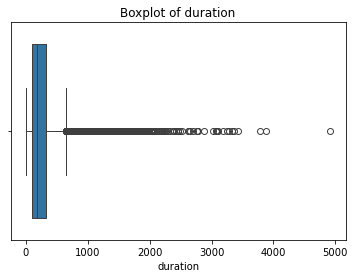

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['duration'])
plt.title("Boxplot of duration")
plt.show()

In [66]:
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Outlier threshold: duration < {lower_bound:.1f} or duration > {upper_bound:.1f}")

#Count outliers
outliers = df[(df['duration'] < lower_bound) | (df['duration'] > upper_bound)]
print(f"\nNumber of outliers in duration: {len(outliers)}")

#Outlier values
print("\nOutlier values:")
print(outliers['duration'].value_counts().sort_index())

Outlier threshold: duration < -221.0 or duration > 643.0

Number of outliers in duration: 3235

Outlier values:
644     13
645     15
646      7
647      8
648      9
        ..
3366     1
3422     1
3785     1
3881     1
4918     1
Name: duration, Length: 929, dtype: int64


# Understanding Contact History

### Purpose of Contact History Analysis
This contact history analysis—using previous, pdays, and poutcome—is performed to better understand the nature of client engagement in past campaigns. The goal is to determine which segments of the data are meaningful for training the classification model.

In [7]:
# Filter rows where y = 'yes' and check poutcome
subset = df[df['y'] == 'yes']

# Unique values in poutcome where y is yes
print(subset['poutcome'].value_counts())

unknown    3386
success     978
failure     618
other       307
Name: poutcome, dtype: int64


### Key Insights
While analyzing the dataset, it was observed that the `poutcome` (outcome of the previous marketing campaign) ***does not always equal 'success'*** for records where **'y = 'yes'**. This indicates that a successful subscription can still occur even if the previous campaign was unsuccessful or nonexistent.

Implication:
The poutcome variable should be treated as an independent feature, and not assumed to fully determine the current outcome y. Model training should not rely on a strict dependency between these two fields, and such records should be retained as-is to preserve data integrity and variability.

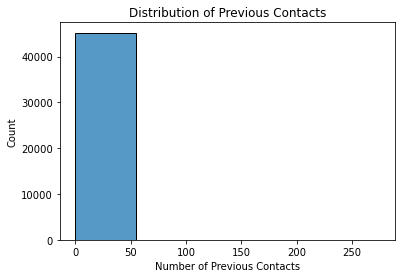

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['previous'], bins=5, kde=False)
plt.title("Distribution of Previous Contacts")
plt.xlabel("Number of Previous Contacts")
plt.ylabel("Count")
plt.show()

In [14]:
import pandas as pd

# Group by previous and check conversion rate
conversion_by_previous = df.groupby('previous')['y'].value_counts(normalize=True).unstack()

How the above Code works ?
1. Groups the dataset by the values in the previous column and selects the y values within each group.
2. For each group, it counts the occurrences of yes and no, and with normalize=True, it converts the counts to proportions (i.e., relative frequency within each group).
3. Transforms the result from multi-indexed series into a DataFrame, where:

    - Rows are previous values (0, 1, 2, ...)
    - Columns are the target classes: 'yes' and 'no'
    - Values are the proportions (fractions from above)


In [15]:
conversion_by_previous

y,no,yes
previous,,
0,0.908427,0.091573
1,0.789683,0.210317
2,0.783476,0.216524
3,0.742557,0.257443
4,0.760504,0.239496
5,0.736383,0.263617
6,0.700361,0.299639
7,0.736585,0.263415
8,0.697674,0.302326


### Key Insights
Analysis of the previous variable shows a clear trend: clients with at least one prior contact are significantly more likely to subscribe. While first-time contacts (previous = 0) convert at only ~9%, ***the conversion rate increases steadily with repeated prior contact***, peaking around 5 previous attempts. However, cases like previous = 7 with 100% "no" responses may indicate diminishing returns or sample bias. This feature is a strong predictor and should be retained during modeling.

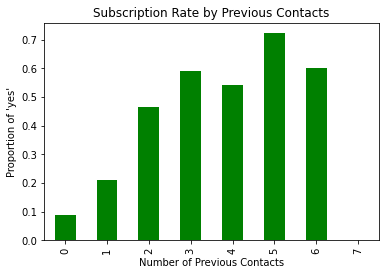

In [12]:
# Plot conversion rate for 'yes' by previous contact count
conversion_by_previous[1] = conversion_by_previous['yes']
conversion_by_previous[1].plot(kind='bar', color='green')
plt.title("Subscription Rate by Previous Contacts")
plt.ylabel("Proportion of 'yes'")
plt.xlabel("Number of Previous Contacts")
plt.show()

In [9]:
# Understand how the number of previous contacts relates to the outcome 
# of those contacts (success, failure, nonexistent).
pd.crosstab(df['previous'], df['poutcome'])

poutcome,failure,nonexistent,success
previous,,,
0,0,35563,0
1,3696,0,865
2,434,0,320
3,88,0,128
4,30,0,40
5,3,0,15
6,1,0,4
7,0,0,1


In [10]:
# What’s the success rate among clients with no prior contact history?
df[df['previous'] == 0]['y'].value_counts(normalize=True)

no     0.911678
yes    0.088322
Name: y, dtype: float64

### Key Insights
Out of all clients contacted for the first time, only ~8.8% subscribed to a term deposit.
That means ~91.2% said "no" — a high rejection rate.
This suggests that:
- Cold calling is not very effective on its own.
- First contact success is low, and follow-up (i.e., repeated engagement) likely improves conversion.

To find clients who were never contacted before and were not contacted in the current campaign, we need to examine both previous and pdays (if available) or just previous and contact depending on what's in our dataset.

### Can we derive "Never Contacted" or "Least Contacted"

A client can be considered never contacted if:

- `previous == 0` → No prior campaign contact
- `pdays == 999` → Not contacted in the last campaign
- `poutcome == 'nonexistent'` → No outcome from previous campaign (means no previous attempt)

In [23]:
never_or_least_contacted = df[
    (df['previous'] == 0) &
    (df['pdays'] == 999) &
    (df['poutcome'] == 'nonexistent') 
]

In [25]:
never_or_least_contacted

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [27]:
print(f"Number of never-contacted or least-contacted clients: {len(never_or_least_contacted)}")
print(never_or_least_contacted['y'].value_counts(normalize=True))

Number of never-contacted or least-contacted clients: 35563
no     0.911678
yes    0.088322
Name: y, dtype: float64


## Findings from Client Contact History Analysis
This dataset is campaign-based, meaning each record reflects a contact made to a client during a specific marketing campaign. While columns like previous, pdays, and poutcome are often used to infer contact history, their interpretation requires care:
- `pdays = 999` indicates the client was not contacted in the most recent campaign, but they may have been reached in the past. This value suggests the client hasn't been engaged recently and may still be a relevant target for future sales.
- `poutcome = 'nonexistent'` does not mean the client was never contacted; it indicates that no clear result (like success or failure) was recorded from a prior campaign. It could mean the client was contacted but hasn’t yet made a decision.

Therefore, clients with pdays = 999 and poutcome = 'nonexistent' are not necessarily "untouched" customers, but rather those with unclear or outdated history. 
While they may be valuable for sales follow-up, ***they are less useful for training machine learning classification models***, which rely on recent and well-defined outcomes to learn patterns.

## Check for Class Imbalance

Typical thresholds:
- Balanced: Class ratio ~50:50
- Mildly imbalanced: 60:40
- Moderately imbalanced: 70:30
- Heavily imbalanced: 80:20 or worse

In [28]:
# Filter to keep only clients with meaningful past interaction
filtered_df = df[
    ~((df['previous'] == 0) & (df['pdays'] == 999) & (df['poutcome'] == 'nonexistent'))
]

In [29]:
filtered_df['y'].value_counts(normalize=True)

no     0.733511
yes    0.266489
Name: y, dtype: float64

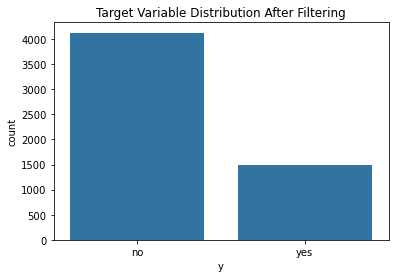

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=filtered_df, x='y')
plt.title("Target Variable Distribution After Filtering")
plt.show()